In [198]:
pip install streamlit

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [200]:
from google.colab import drive
drive.mount( '/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
data='/content/drive/MyDrive/Datasheet/E-Commerce Public Dataset/products_dataset.csv'

In [202]:
data2='/content/drive/MyDrive/Datasheet/E-Commerce Public Dataset/customers_dataset.csv'

In [203]:
data3='/content/drive/MyDrive/Datasheet/E-Commerce Public Dataset/order_items_dataset.csv'

In [204]:
data4='/content/drive/MyDrive/Datasheet/E-Commerce Public Dataset/product_category_name_translation.csv'

In [205]:
data5='/content/drive/MyDrive/Datasheet/E-Commerce Public Dataset/orders_dataset.csv'

# Data Preparation

In [206]:
products_df=pd.read_csv(data)

In [207]:
customers_df=pd.read_csv(data2)

In [208]:
order_item_df=pd.read_csv(data3)

In [209]:
translate_df=pd.read_csv(data4)

In [210]:
orders_df=pd.read_csv(data5)

In [211]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [212]:
translate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [213]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [214]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [215]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


karena informasi dari tiap file berbeda, maka perlu dilakukan grouping berdasarkan id tiap order maupun customer. Dalam data ini, saya berpatokan pada order_items.csv untuk pembelian

##proses penggabungan/group by customer_id pada dataset customers dan orders

pada proses ini, kemudian dibuat dataframe baru bernama join_df yang berisikan order_id, customer_city, customer_state, dan order_status

In [216]:
join_df=customers_df.set_index('customer_id').join(orders_df.set_index('customer_id'), how='outer')
join_df=join_df[['order_id', 'customer_city', 'customer_state', 'order_status']]

In [217]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 00012a2ce6f8dcda20d059ce98491703 to ffffe8b65bbe3087b653a978c870db99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        99441 non-null  object
 1   customer_city   99441 non-null  object
 2   customer_state  99441 non-null  object
 3   order_status    99441 non-null  object
dtypes: object(4)
memory usage: 3.8+ MB


##proses penggabungan/group by order_id pada dataframe join_df dengan dataframe order_item_df

pada proses ini, kemudian dibuat dataframe baru bernama join yang berisikan product_id, customer_city, customer_state, price, dan order_status

In [218]:
join2_df=join_df.set_index('order_id').join(order_item_df.set_index('order_id'), how='right')
join=join2_df[['product_id','customer_city','customer_state','price', 'order_status']]

In [219]:
join2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112650 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_city        112650 non-null  object 
 1   customer_state       112650 non-null  object 
 2   order_status         112650 non-null  object 
 3   order_item_id        112650 non-null  int64  
 4   product_id           112650 non-null  object 
 5   seller_id            112650 non-null  object 
 6   shipping_limit_date  112650 non-null  object 
 7   price                112650 non-null  float64
 8   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 8.6+ MB


In [220]:
join.head(-5)

,product_id,customer_city,customer_state,price,order_status
order_id,,,,,
00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,campos dos goytacazes,RJ,58.90,delivered
00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,santa fe do sul,SP,239.90,delivered
000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,para de minas,MG,199.00,delivered
00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,atibaia,SP,12.99,delivered
00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,varzea paulista,SP,199.90,delivered
...,...,...,...,...,...
fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,serra talhada,PE,55.00,delivered
fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,serra talhada,PE,55.00,delivered
fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,serra talhada,PE,55.00,delivered


##proses penggabungan/group by product_id pada dataframe join dengan dataframe product_df

pada proses ini, kemudian dibuat dataframe baru bernama join3_df yang berisikan customer_city, customer_state, price, order_status, dan product_category_name

In [221]:
join2=join.set_index('product_id').join(products_df.set_index('product_id'),how='right')
join3_df=join2[['customer_city', 'customer_state', 'price', 'order_status', 'product_category_name']]

In [222]:
join3_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112650 entries, 00066f42aeeb9f3007548bb9d3f33c38 to fffe9eeff12fcbd74a2f2b007dde0c58
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_city          112650 non-null  object 
 1   customer_state         112650 non-null  object 
 2   price                  112650 non-null  float64
 3   order_status           112650 non-null  object 
 4   product_category_name  111047 non-null  object 
dtypes: float64(1), object(4)
memory usage: 5.2+ MB


terlihat bahwa product category name memiliki missing value sehingga perlu dilakukan data manipulation supaya jumlah data sama

In [223]:
join3_df.product_category_name.fillna('NA',inplace=True)

<ipython-input-223-dc849a8c5b57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join3_df.product_category_name.fillna('NA',inplace=True)


In [224]:
join3_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112650 entries, 00066f42aeeb9f3007548bb9d3f33c38 to fffe9eeff12fcbd74a2f2b007dde0c58
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_city          112650 non-null  object 
 1   customer_state         112650 non-null  object 
 2   price                  112650 non-null  float64
 3   order_status           112650 non-null  object 
 4   product_category_name  112650 non-null  object 
dtypes: float64(1), object(4)
memory usage: 5.2+ MB


Jumlah data sudah sama, yang berarti proses data manipulation telah berhasil

##proses penggabungan/group by product_category_name pada dataframe join3_df dengan dataframe translate_df

pada proses ini, kemudian dibuat dataframe baru bernama final_df yang berisikan customer_city, customer_state, price, order_status, dan product_category_name_english

final_df merupakan dataframe yang diolah

In [225]:
final_df=join3_df.set_index('product_category_name').join(translate_df.set_index('product_category_name'), how='left')

In [226]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112650 entries, NA to utilidades_domesticas
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_city                  112650 non-null  object 
 1   customer_state                 112650 non-null  object 
 2   price                          112650 non-null  float64
 3   order_status                   112650 non-null  object 
 4   product_category_name_english  111023 non-null  object 
dtypes: float64(1), object(4)
memory usage: 5.2+ MB


Dari final tabel yang akan digunakan, category name in english terdapat missing value, sehingga dilakukan data manipulation

In [227]:
final_df.product_category_name_english.fillna('NA',inplace=True)

In [228]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112650 entries, NA to utilidades_domesticas
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_city                  112650 non-null  object 
 1   customer_state                 112650 non-null  object 
 2   price                          112650 non-null  float64
 3   order_status                   112650 non-null  object 
 4   product_category_name_english  112650 non-null  object 
dtypes: float64(1), object(4)
memory usage: 5.2+ MB


Jumlah setiap data sudah sama, sehingga tidak ada missing value. Data telah siap dilakukan Analisis

# Bagaimana Demografi Customer?

In [229]:
jumlah_cust=final_df.groupby(['customer_state','customer_city'])['order_status'].count().reset_index()
print(jumlah_cust)

     customer_state            customer_city  order_status
0                AC                brasileia             3
1                AC          cruzeiro do sul             3
2                AC           epitaciolandia             1
3                AC            manoel urbano             1
4                AC               porto acre             1
...             ...                      ...           ...
4295             TO             silvanopolis             1
4296             TO  sitio novo do tocantins             4
4297             TO               taguatinga             3
4298             TO           tocantinopolis             8
4299             TO                  xambioa             3

[4300 rows x 3 columns]


In [230]:
jumlah=jumlah_cust.sort_values(by='order_status', ascending=False)
print(jumlah)

     customer_state   customer_city  order_status
4166             SP       sao paulo         17808
2782             RJ  rio de janeiro          7837
1059             MG  belo horizonte          3144
600              DF        brasilia          2392
2402             PR        curitiba          1751
...             ...             ...           ...
1038             MG          arapua             1
3404             SC          galvao             1
3403             SC    frei rogerio             1
1049             MG         baguari             1
3259             RS    sao martinho             1

[4300 rows x 3 columns]


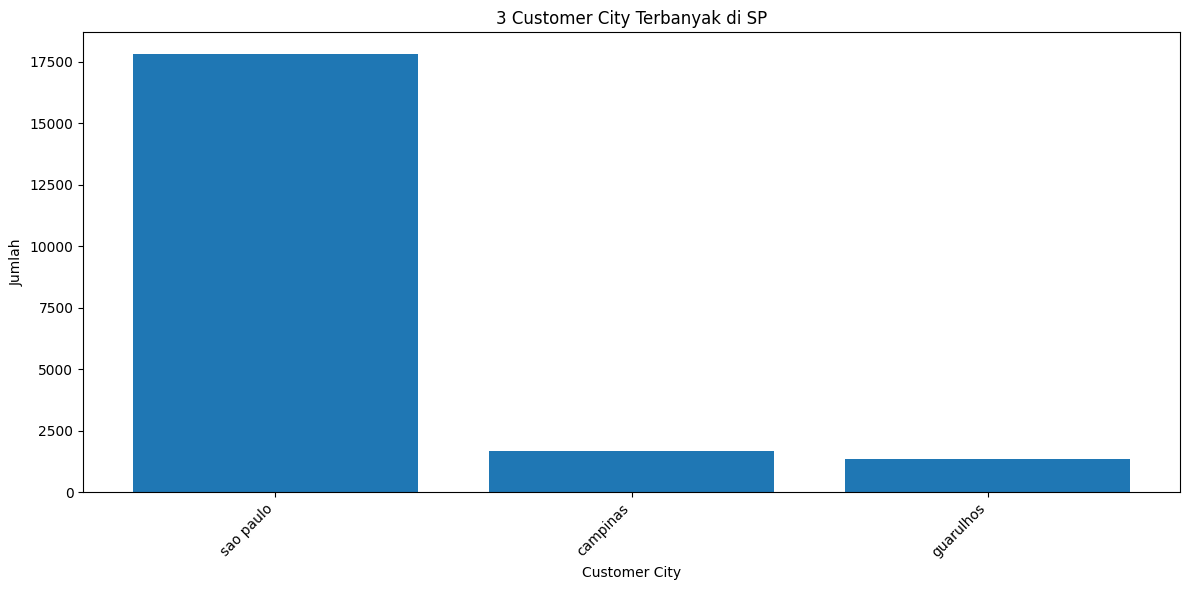

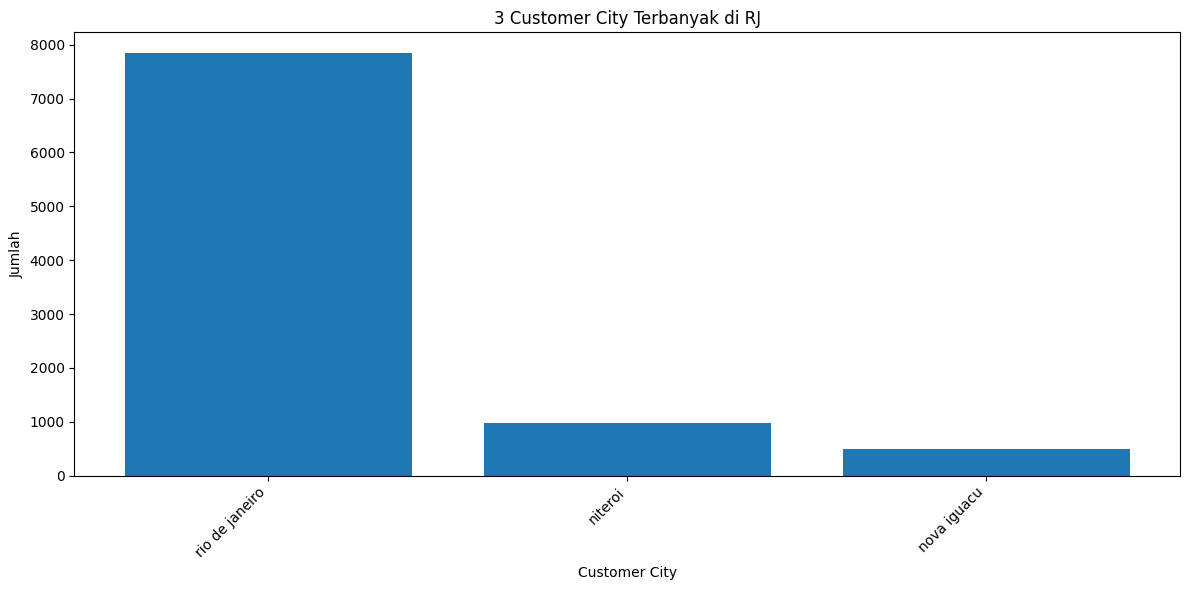

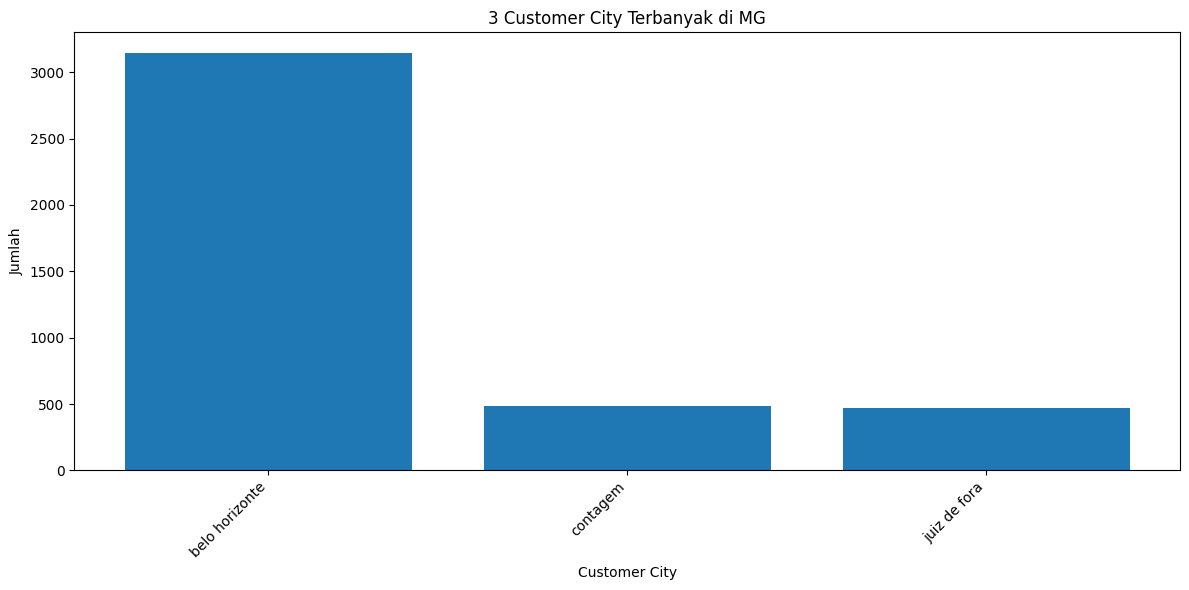

DeltaGenerator()

In [231]:
# Mencari 3 customer_state terbanyak
top_3_states = jumlah_cust.groupby('customer_state')['order_status'].sum().nlargest(3).index

# Membuat bar chart untuk setiap customer_state
for state in top_3_states:
    state_data = jumlah_cust[jumlah_cust['customer_state'] == state]
    top_3_cities_in_state = state_data.nlargest(3, 'order_status')

    plt.figure(figsize=(12, 6))
    plt.bar(top_3_cities_in_state['customer_city'], top_3_cities_in_state['order_status'])
    plt.title(f'3 Customer City Terbanyak di {state}')
    plt.xlabel('Customer City')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

st.pyplot(fig)

# Produk Manakah yang Paling Laris Terjual?

In [232]:
jumlah_produk=final_df.groupby('product_category_name_english')['order_status'].count().reset_index()
print(jumlah_produk)

   product_category_name_english  order_status
0                             NA          1627
1     agro_industry_and_commerce           212
2               air_conditioning           297
3                            art           209
4          arts_and_craftmanship            24
..                           ...           ...
67                    stationery          2517
68        tablets_printing_image            83
69                     telephony          4545
70                          toys          4117
71                 watches_gifts          5991

[72 rows x 2 columns]


In [233]:
jumlah_produk=jumlah_produk.sort_values(by='order_status', ascending=False)
print(jumlah_produk)

   product_category_name_english  order_status
8                 bed_bath_table         11115
44                 health_beauty          9670
66                sports_leisure          8641
40               furniture_decor          8334
16         computers_accessories          7827
..                           ...           ...
4          arts_and_craftmanship            24
12             cds_dvds_musicals            14
53                    la_cuisine            14
30     fashion_childrens_clothes             8
62         security_and_services             2

[72 rows x 2 columns]


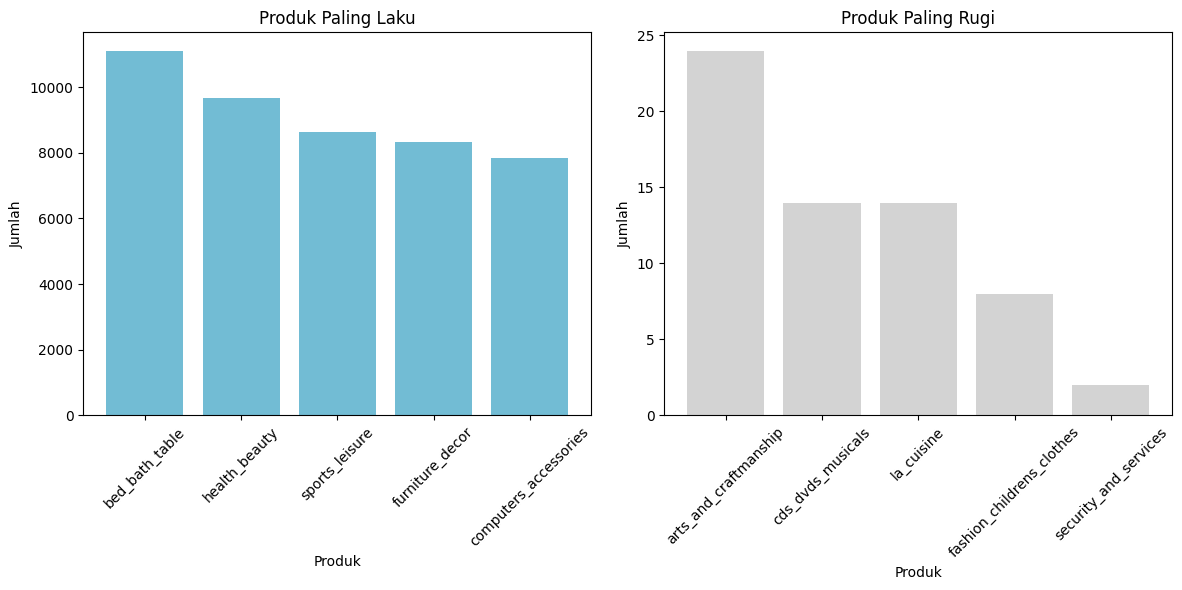

DeltaGenerator()

In [234]:
laku = jumlah_produk.head(5)
rugi = jumlah_produk.tail(5)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(laku['product_category_name_english'], laku['order_status'], color='#72BCD4')
axes[0].set_title('Produk Paling Laku')
axes[0].set_xlabel('Produk')
axes[0].set_ylabel('Jumlah')

axes[1].bar(rugi['product_category_name_english'], rugi['order_status'], color='#D3D3D3')
axes[1].set_title('Produk Paling Rugi')
axes[1].set_xlabel('Produk')
axes[1].set_ylabel('Jumlah')

axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

st.pyplot(fig)